# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


api_key = "8bf1bdcf220e18ae557ed4512f99aa3f"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q="
weather_response = requests.get(query_url + city).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": 69.22,
        "lon": -51.1
    },
    "dt": 1552261800,
    "id": 3423146,
    "main": {
        "humidity": 66,
        "pressure": 1011,
        "temp": 262.15,
        "temp_max": 262.15,
        "temp_min": 262.15
    },
    "name": "Ilulissat",
    "sys": {
        "country": "GL",
        "id": 165,
        "message": 0.005,
        "sunrise": 1552298679,
        "sunset": 1552338366,
        "type": 1
    },
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 4.6
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
cloudiness = []
#cloudiness2 = []
humidity = []
date = []
country = []
max_temp = []
wind_speed = []
lat = []
lng = []
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q="
for city in cities:
    print(f"Processing record for {city}")
    try:
        weather_response = requests.get(query_url + city).json()
        humidity.append(weather_response["main"]["humidity"])
        date.append(weather_response["dt"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        Fahrenheit = ((weather_response["main"]["temp_max"]) - 273.15) * (9/5) + 32
        max_temp.append(Fahrenheit)
        country.append(weather_response["sys"]["country"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
    except:
        print("City does not exist, skipping")
        humidity.append("NaN")
        date.append("NaN")
        cloudiness.append("NaN")
        wind_speed.append("NaN")
        max_temp.append("NaN")
        country.append("NaN")
        lat.append("NaN")
        lng.append("NaN")





Processing record for butaritari
Processing record for hilo
Processing record for barrow
Processing record for kirakira
Processing record for rikitea
Processing record for longyearbyen
Processing record for arraial do cabo
Processing record for cape town
Processing record for vaini
Processing record for rincon
Processing record for nogliki
Processing record for qaanaaq
Processing record for along
Processing record for linxia
Processing record for mananara
City does not exist, skipping
Processing record for vestmannaeyjar
Processing record for hobart
Processing record for narsaq
Processing record for albany
Processing record for airai
Processing record for fuente de oro
Processing record for ushuaia
Processing record for mataura
Processing record for belushya guba
City does not exist, skipping
Processing record for karaul
City does not exist, skipping
Processing record for igarka
Processing record for tiarei
Processing record for kayattar
Processing record for fairbanks
Processing recor

Processing record for tayu
Processing record for namatanai
Processing record for bandarbeyla
Processing record for falealupo
City does not exist, skipping
Processing record for noshiro
Processing record for miyako
Processing record for westport
Processing record for portland
Processing record for toliary
City does not exist, skipping
Processing record for key west
Processing record for upernavik
Processing record for dzhusaly
City does not exist, skipping
Processing record for college
Processing record for grand river south east
City does not exist, skipping
Processing record for chuy
Processing record for camapua
Processing record for sao filipe
Processing record for barranca
Processing record for coihaique
Processing record for walvis bay
Processing record for chara
Processing record for fayaoue
Processing record for vila franca do campo
Processing record for prince rupert
Processing record for cabo san lucas
Processing record for yuncheng
Processing record for fallon
Processing reco

Processing record for puerto penasco
Processing record for tatarsk
Processing record for sulangan
Processing record for kulhudhuffushi
Processing record for tungor
Processing record for vila do maio
Processing record for malwan
City does not exist, skipping
Processing record for hovd
Processing record for northam
Processing record for bara
Processing record for sioux lookout
Processing record for bonavista
Processing record for leeton
Processing record for manokwari
Processing record for mvuma
Processing record for araguacu
City does not exist, skipping
Processing record for huacho
Processing record for vilyuysk
Processing record for warrington
Processing record for tambopata
City does not exist, skipping
Processing record for chotebor
Processing record for zelenogradsk
Processing record for tessalit
Processing record for victor harbor
Processing record for grand gaube
Processing record for torit
City does not exist, skipping
Processing record for solovetskiy
City does not exist, skipp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
Weather_data = pd.DataFrame({"City": cities, "Humidity": humidity, "Date": date, "Country": country, "Max Temperature (F)": max_temp, "Wind Speed (mph)": wind_speed, "Cloudiness": cloudiness, "Lattitude":lat, "Longitude":lng})
#for column in Weather_data:
Weather_data_refined  = Weather_data[Weather_data.Humidity != "NaN"]
Weather_csv = Weather_data_refined.to_csv(output_data_file, encoding='utf-8', index=False)
Weather_data_refined

,City,Humidity,Date,Country,Max Temperature (F),Wind Speed (mph),Cloudiness,Lattitude,Longitude
0,butaritari,100,1552264002,KI,82.724,6.57,80,3.07,172.79
1,hilo,73,1552263861,US,73.994,1.5,75,19.71,-155.08
2,barrow,46,1552264003,AR,63.284,3.42,0,-38.31,-60.23
3,kirakira,100,1552264003,SB,83.624,3.67,24,-10.46,161.92
4,rikitea,100,1552264003,PF,76.019,6.77,80,-23.12,-134.97
5,longyearbyen,59,1552261800,NO,1.4,1.5,20,78.22,15.63
6,arraial do cabo,93,1552264004,BR,80.249,2.92,36,-22.97,-42.02
7,cape town,77,1552263753,ZA,64.004,9.3,20,-33.93,18.42
8,vaini,89,1552264005,IN,62.744,0.67,0,15.34,74.49
9,rincon,73,1552263853,US,77,2.77,90,32.3,-81.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

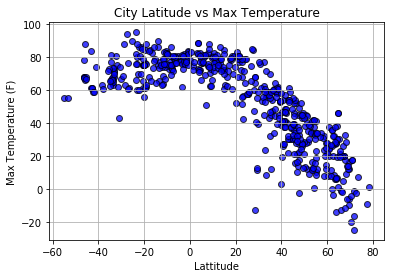

In [16]:
x_temp = Weather_data["Lattitude"]
y_temp = Weather_data["Max Temperature (F)"]

Lat_temp = plt.scatter(x_temp, y_temp, marker="o", facecolors="blue", edgecolors="black",
             alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Graphs/City vs Max Temp Graph.png")

#### Latitude vs. Humidity Plot

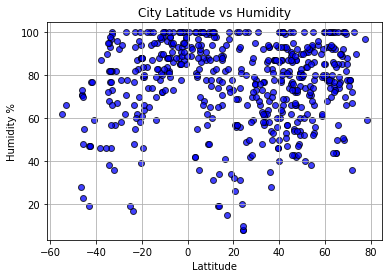

In [17]:
x_humid = Weather_data["Lattitude"]
y_humid = Weather_data["Humidity"]

Lat_humid = plt.scatter(x_humid, y_humid, marker="o", facecolors="blue", edgecolors="black",
             alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity %")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Graphs/City vs Humidity Graph.png")

#### Latitude vs. Cloudiness Plot

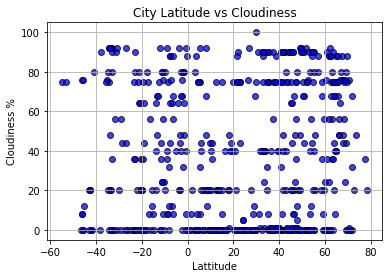

In [18]:
x_Cloudiness = Weather_data["Lattitude"]
y_Cloudiness = Weather_data["Cloudiness"]

Lat_Cloudiness = plt.scatter(x_Cloudiness, y_Cloudiness, marker="o", facecolors="blue", edgecolors="black",
             alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness %")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Graphs/City vs Cloudiness Graph.png")


#### Latitude vs. Wind Speed Plot

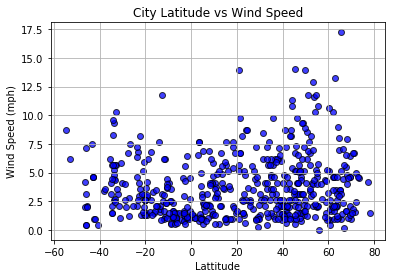

In [19]:
x_wind = Weather_data["Lattitude"]
y_wind = Weather_data["Wind Speed (mph)"]

Lat_wind = plt.scatter(x_wind, y_wind, marker="o", facecolors="blue", edgecolors="black",
             alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Graphs/City vs Wind Speed Graph.png")